In [105]:
# Danesh Abdollahi _ 9723053 _ HW3 _ Dr.Seyyedin _ Fall 2021

In [106]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , KFold
from scipy.stats import multivariate_normal

In [107]:
Dataset =  pd.read_csv('/content/iris.data', sep="," , header=None)
Class0 = "Iris-setosa"
Class1 = "Iris-versicolor"
Class2 = "Iris-virginica"

X = Dataset.iloc[:,0:4] # Inputs
Y = Dataset.iloc[:,-1]  # Outputs

X_Class0 = X.iloc[0:50,:] 
Y_Class0 = Y.iloc[0:50]

X_Class1 = X.iloc[50:100,:]
Y_Class1 = Y.iloc[50:100]

X_Class2 = X.iloc[100:150,:]
Y_Class2 = Y.iloc[100:150]

				Iteration 1
Accuracy On Test Dataset In Percent = 93.33333333333333
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         26.66666667  6.66666667]
 [ 0.          0.         33.33333333]]




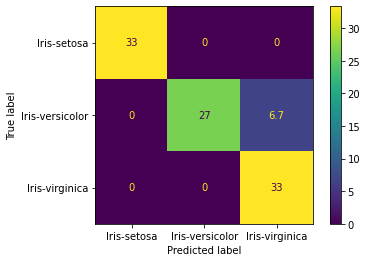



Accuracy On Train Dataset In Percent = 99.04761904761905
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         32.38095238  0.95238095]
 [ 0.          0.         33.33333333]]




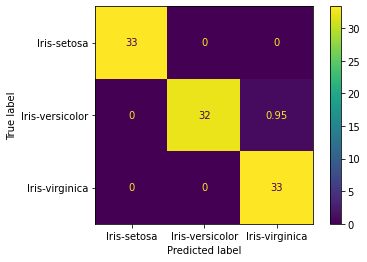

--------------------------------------------------------------------
				Iteration 2
Accuracy On Test Dataset In Percent = 100.0
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         33.33333333  0.        ]
 [ 0.          0.         33.33333333]]




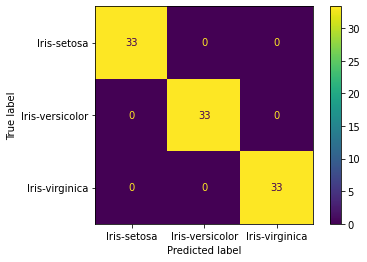



Accuracy On Train Dataset In Percent = 97.14285714285714
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         31.42857143  1.9047619 ]
 [ 0.          0.95238095 32.38095238]]




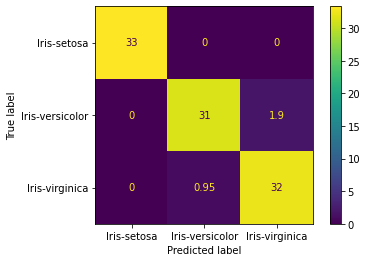

--------------------------------------------------------------------
Average Accuracy On Test Dataset In Percent =  96.66666666666667
Average Test Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         30.          3.33333333]
 [ 0.          0.         33.33333333]]




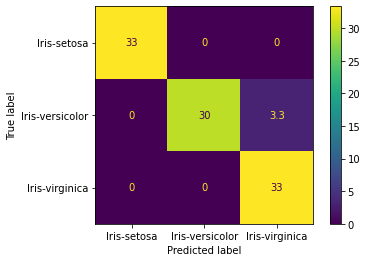



Average Accuracy On Train Dataset In Percent =  98.0952380952381
Average Train Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         31.9047619   1.42857143]
 [ 0.          0.47619048 32.85714286]]




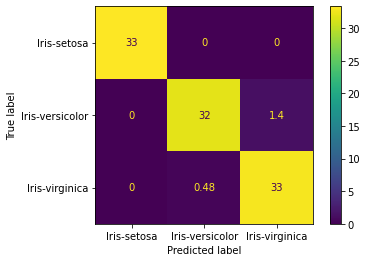

In [108]:
# Part A
Average_Acc_On_Test = 0 
Average_Acc_On_Train = 0
Average_Test_Conf_Mat = 0
Average_Train_Conf_Mat = 0
for i in range(2): # Run The Algorithm For 2 Iteration
  print(f"\t\t\t\tIteration {i+1}")
  # Splitting Dataset To Train Dataset & Test Dataset
  X_Train0 , X_Test0 , Y_Train0 , Y_Test0 = train_test_split( X_Class0 , Y_Class0 , test_size= 0.3 , shuffle=True , random_state = i+4 )
  X_Train1 , X_Test1 , Y_Train1 , Y_Test1 = train_test_split( X_Class1 , Y_Class1 , test_size= 0.3 , shuffle=True , random_state = i+4 )
  X_Train2 , X_Test2 , Y_Train2 , Y_Test2 = train_test_split( X_Class2 , Y_Class2 , test_size= 0.3 , shuffle=True , random_state = i+4 )

  X_Train = pd.concat([X_Train0, X_Train1 , X_Train2], axis=0)
  Y_Train = pd.concat([Y_Train0, Y_Train1 , Y_Train2], axis=0)

  X_Test = pd.concat([X_Test0, X_Test1 , X_Test2], axis=0)
  Y_Test = pd.concat([Y_Test0, Y_Test1 , Y_Test2], axis=0)




#-------------------------------------------------------------------------------------#
  # Training Stage
  Mu0 = np.mean(X_Train0) # Mean Matrix Of Class 0
  Covariance_Matrix0 = np.cov(X_Train0.T) # Covariance Matrix Of Class 0

  Mu1 = np.mean(X_Train1) # Mean Matrix Of Class 1
  Covariance_Matrix1 = np.cov(X_Train1.T) # Covariance Matrix Of Class 1

  Mu2 = np.mean(X_Train2) # Mean Matrix Of Class 2
  Covariance_Matrix2 = np.cov(X_Train2.T) # Covariance Matrix Of Class 2
#-------------------------------------------------------------------------------------#
  # Testing On Test Dataset ( ML Method )
  Prob0 = multivariate_normal.pdf( X_Test, mean = Mu0 , cov = Covariance_Matrix0 ) # P( X_Test | Class 0)
  Prob1 = multivariate_normal.pdf( X_Test, mean = Mu1 , cov = Covariance_Matrix1 ) # P( X_Test | Class 1)
  Prob2 = multivariate_normal.pdf( X_Test, mean = Mu2 , cov = Covariance_Matrix2 ) # P( X_Test | Class 2)
  Y_Predict = []
  for i in range(X_Test.shape[0]): # Predicting X_Test Dataset Class
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy On Test Dataset
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Test.values[i]:
      Error_Counter += 1

  Error_On_Test = Error_Counter / X_Test.shape[0]
  Acc_On_Test = 1 - Error_On_Test
  Average_Acc_On_Test += Acc_On_Test 
  print(f"Accuracy On Test Dataset In Percent = {Acc_On_Test*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Test.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Test_Conf_Mat += CM
  print('Confusion Matrix In Percent:\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  print("\n")
  
#-------------------------------------------------------------------------------------#
  # Testing On Train Dataset ( ML )
  Prob0 = multivariate_normal.pdf( X_Train, mean = Mu0 , cov = Covariance_Matrix0 ) # P( X_Train | Class 0)
  Prob1 = multivariate_normal.pdf( X_Train, mean = Mu1 , cov = Covariance_Matrix1 ) # P( X_Train | Class 1)
  Prob2 = multivariate_normal.pdf( X_Train, mean = Mu2 , cov = Covariance_Matrix2 ) # P( X_Train | Class 2)
  Y_Predict = []
  for i in range(X_Train.shape[0]): # Predicting X_Train Dataset Class
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Train.values[i]:
      Error_Counter += 1

  Error_On_Train = Error_Counter / X_Train.shape[0]
  Acc_On_Train = 1 - Error_On_Train
  Average_Acc_On_Train += Acc_On_Train
  print(f"Accuracy On Train Dataset In Percent = {Acc_On_Train*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Train.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Train_Conf_Mat += CM
  print('Confusion Matrix In Percent :\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  
  print("--------------------------------------------------------------------")

print("Average Accuracy On Test Dataset In Percent = ",Average_Acc_On_Test*100/2 )
print("Average Test Dataset Confusion Matrix In Percent = \n",Average_Test_Conf_Mat/2 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Test_Conf_Mat/2 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")
print("Average Accuracy On Train Dataset In Percent = ",Average_Acc_On_Train*100/2 )
print("Average Train Dataset Confusion Matrix In Percent = \n",Average_Train_Conf_Mat/2 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Train_Conf_Mat/2 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()


				Iteration 1
Accuracy On Test Dataset In Percent = 92.3076923076923
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         25.64102564  7.69230769]
 [ 0.          0.         33.33333333]]




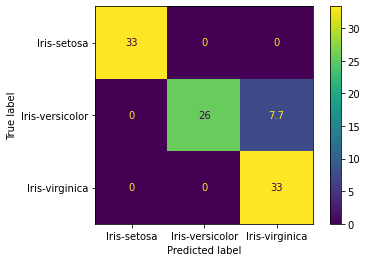



Accuracy On Train Dataset In Percent = 99.09909909909909
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         32.43243243  0.9009009 ]
 [ 0.          0.         33.33333333]]




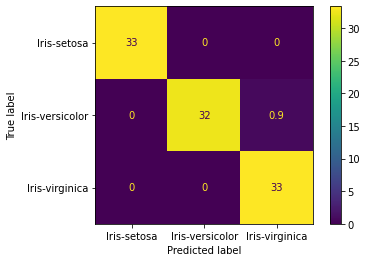

--------------------------------------------------------------------
				Iteration 2
Accuracy On Test Dataset In Percent = 97.43589743589743
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         30.76923077  2.56410256]
 [ 0.          0.         33.33333333]]




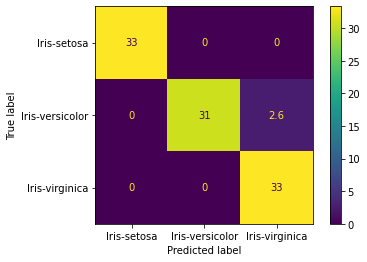



Accuracy On Train Dataset In Percent = 98.1981981981982
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         32.43243243  0.9009009 ]
 [ 0.          0.9009009  32.43243243]]




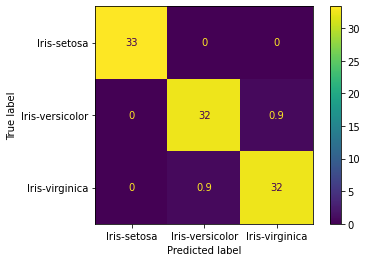

--------------------------------------------------------------------
				Iteration 3
Accuracy On Test Dataset In Percent = 100.0
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         33.33333333  0.        ]
 [ 0.          0.         33.33333333]]




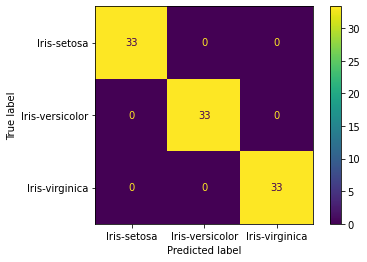



Accuracy On Train Dataset In Percent = 97.36842105263158
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         31.57894737  1.75438596]
 [ 0.          0.87719298 32.45614035]]




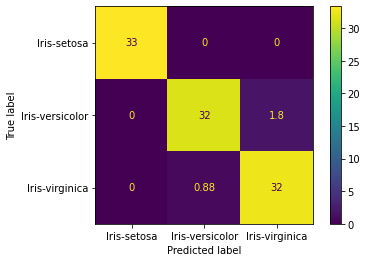

--------------------------------------------------------------------
				Iteration 4
Accuracy On Test Dataset In Percent = 100.0
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         33.33333333  0.        ]
 [ 0.          0.         33.33333333]]




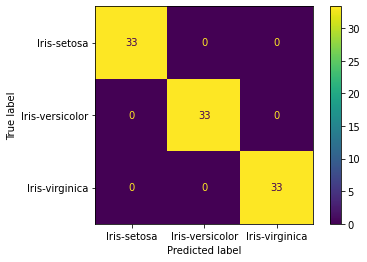



Accuracy On Train Dataset In Percent = 97.36842105263158
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         31.57894737  1.75438596]
 [ 0.          0.87719298 32.45614035]]




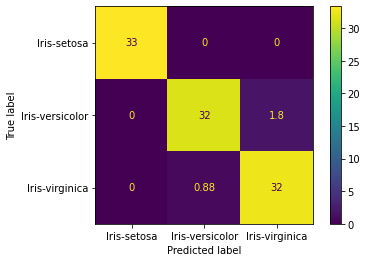

--------------------------------------------------------------------
Average Accuracy On Test Dataset In Percent =  97.43589743589743
Average Test Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         30.76923077  2.56410256]
 [ 0.          0.         33.33333333]]




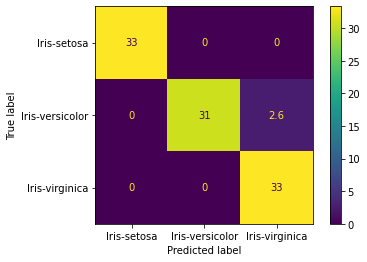



Average Accuracy On Train Dataset In Percent =  98.00853485064012
Average Train Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         32.0056899   1.32764343]
 [ 0.          0.66382172 32.66951162]]




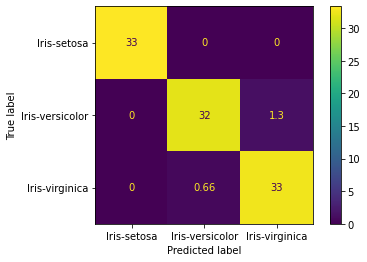

In [109]:
# Part B
# 4-Fold Cross Validation
k = 4 
kf = KFold(n_splits = k , shuffle=True , random_state = 4)

Train0 = []
Train1 = []
Train2 = []
Test0 = []
Test1 = []
Test2 = []
Average_Acc_On_Test = 0 
Average_Acc_On_Train = 0
Average_Test_Conf_Mat = 0
Average_Train_Conf_Mat = 0
#-------------------------------------------------------------------------------------#
# Splitting Dataset To Train Dataset & Test Dataset
for train_indices, test_indices in kf.split(X_Class0):
  Test0.append(test_indices)
  Train0.append(train_indices)

for train_indices, test_indices in kf.split(X_Class1):
  Test1.append(test_indices)
  Train1.append(train_indices)

for train_indices, test_indices in kf.split(X_Class2):
  Test2.append(test_indices)
  Train2.append(train_indices)
#-------------------------------------------------------------------------------------#
for i in range(4): # 4 Iteration Of 4_Fold Cross Validation Method
  print(f"\t\t\t\tIteration {i+1}")
    # Training Stage
  Mu0 = np.mean(X_Class0.iloc[Train0[i]]) # Mean Matrix Of Class 0
  Covariance_Matrix0 = np.cov(X_Class0.iloc[Train0[i]].T) # Covariance Matrix Of  Class 0

  Mu1 = np.mean(X_Class1.iloc[Train1[i]]) # Mean Matrix Of Class 1
  Covariance_Matrix1 = np.cov(X_Class1.iloc[Train1[i]].T) # Covariance Matrix Of  Class 1

  Mu2 = np.mean(X_Class2.iloc[Train2[i]]) # Mean Matrix Of Class 2
  Covariance_Matrix2 = np.cov(X_Class2.iloc[Train2[i]].T) # Covariance Matrix Of  Class 2

  X_Train = pd.concat([X_Class0.iloc[Train0[i],:], X_Class1.iloc[Train1[i],:] , X_Class2.iloc[Train2[i],:]], axis=0)
  Y_Train = pd.concat([Y_Class0.iloc[Train0[i],],  Y_Class1.iloc[Train1[i],]  , Y_Class2.iloc[Train2[i],]], axis=0)

  X_Test = pd.concat([X_Class0.iloc[Test0[i],:], X_Class1.iloc[Test1[i],:] , X_Class2.iloc[Test2[i],:]], axis=0)
  Y_Test = pd.concat([Y_Class0.iloc[Test0[i],],  Y_Class1.iloc[Test1[i],]  , Y_Class2.iloc[Test2[i],]], axis=0)
#-------------------------------------------------------------------------------------#
# Testing On Test Dataset ( ML )
  Prob0 = multivariate_normal.pdf( X_Test, mean = Mu0 , cov = Covariance_Matrix0 ) # P( X_Test | Class 0)
  Prob1 = multivariate_normal.pdf( X_Test, mean = Mu1 , cov = Covariance_Matrix1 ) # P( X_Test | Class 1)
  Prob2 = multivariate_normal.pdf( X_Test, mean = Mu2 , cov = Covariance_Matrix2 ) # P( X_Test | Class 2)
  Y_Predict = []
  for i in range(X_Test.shape[0]): # Predicting X_Test Dataset Class
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy On Test Dataset
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Test.values[i]:
      Error_Counter += 1

  Error_On_Test = Error_Counter / X_Test.shape[0]
  Acc_On_Test = 1 - Error_On_Test
  Average_Acc_On_Test += Acc_On_Test 
  print(f"Accuracy On Test Dataset In Percent = {Acc_On_Test*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Test.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Test_Conf_Mat += CM
  print('Confusion Matrix In Percent:\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  print("\n")
  
#-------------------------------------------------------------------------------------#
  # Testing On Train Dataset ( ML )
  Prob0 = multivariate_normal.pdf( X_Train, mean = Mu0 , cov = Covariance_Matrix0 ) # P( X_Train | Class 0)
  Prob1 = multivariate_normal.pdf( X_Train, mean = Mu1 , cov = Covariance_Matrix1 ) # P( X_Train | Class 1)
  Prob2 = multivariate_normal.pdf( X_Train, mean = Mu2 , cov = Covariance_Matrix2 ) # P( X_Train | Class 2)
  Y_Predict = []
  for i in range(X_Train.shape[0]): # Predicting X_Train Dataset Class
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Train.values[i]:
      Error_Counter += 1

  Error_On_Train = Error_Counter / X_Train.shape[0]
  Acc_On_Train = 1 - Error_On_Train
  Average_Acc_On_Train += Acc_On_Train
  print(f"Accuracy On Train Dataset In Percent = {Acc_On_Train*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Train.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Train_Conf_Mat += CM
  print('Confusion Matrix In Percent :\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  
  print("--------------------------------------------------------------------")

print("Average Accuracy On Test Dataset In Percent = ",Average_Acc_On_Test*100/4 )
print("Average Test Dataset Confusion Matrix In Percent = \n",Average_Test_Conf_Mat/4 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Test_Conf_Mat/4 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")
print("Average Accuracy On Train Dataset In Percent = ",Average_Acc_On_Train*100/4 )
print("Average Train Dataset Confusion Matrix In Percent = \n",Average_Train_Conf_Mat/4 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Train_Conf_Mat/4 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()

				Iteration 1
Accuracy On Test Dataset In Percent = 93.33333333333333
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         28.88888889  4.44444444]
 [ 0.          2.22222222 31.11111111]]




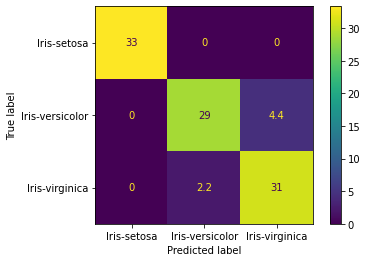



Accuracy On Train Dataset In Percent = 98.09523809523809
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         31.42857143  1.9047619 ]
 [ 0.          0.         33.33333333]]




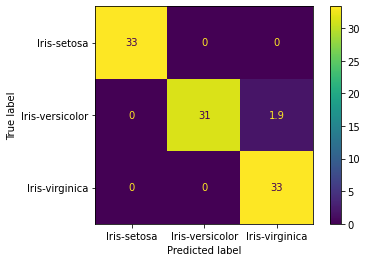

--------------------------------------------------------------------
				Iteration 2
Accuracy On Test Dataset In Percent = 95.55555555555556
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         33.33333333  0.        ]
 [ 0.          4.44444444 28.88888889]]




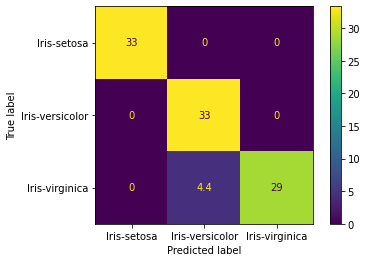



Accuracy On Train Dataset In Percent = 99.04761904761905
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         33.33333333  0.        ]
 [ 0.          0.95238095 32.38095238]]




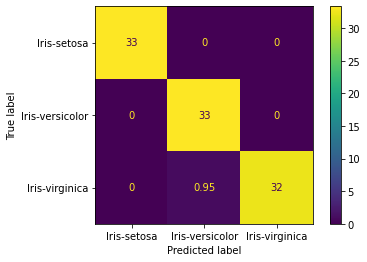

--------------------------------------------------------------------
Average Accuracy On Test Dataset In Percent =  94.44444444444444
Average Test Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         31.11111111  2.22222222]
 [ 0.          3.33333333 30.        ]]




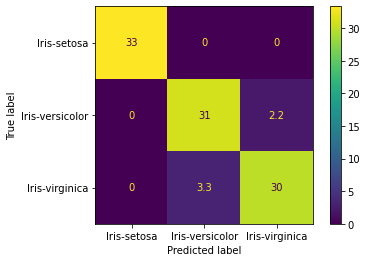



Average Accuracy On Train Dataset In Percent =  98.57142857142858
Average Train Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         32.38095238  0.95238095]
 [ 0.          0.47619048 32.85714286]]




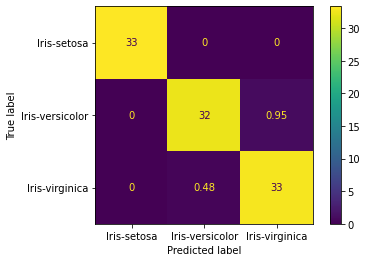

In [110]:
# Part C ( With Method Of Part A )
Average_Acc_On_Test = 0 
Average_Acc_On_Train = 0
Average_Test_Conf_Mat = 0
Average_Train_Conf_Mat = 0
for i in range(2):
  print(f"\t\t\t\tIteration {i+1}")
  # Splitting Dataset To Train Dataset & Test Dataset
  X_Train0 , X_Test0 , Y_Train0 , Y_Test0 = train_test_split( X_Class0 , Y_Class0 , test_size= 0.3 ,  random_state = i+4 )
  X_Train1 , X_Test1 , Y_Train1 , Y_Test1 = train_test_split( X_Class1 , Y_Class1 , test_size= 0.3 ,  random_state = i+4 )
  X_Train2 , X_Test2 , Y_Train2 , Y_Test2 = train_test_split( X_Class2 , Y_Class2 , test_size= 0.3 ,  random_state = i+4 )

  X_Train = pd.concat([X_Train0, X_Train1 , X_Train2], axis=0)
  Y_Train = pd.concat([Y_Train0, Y_Train1 , Y_Train2], axis=0)

  X_Test = pd.concat([X_Test0, X_Test1 , X_Test2], axis=0)
  Y_Test = pd.concat([Y_Test0, Y_Test1 , Y_Test2], axis=0)
#-------------------------------------------------------------------------------------#
  # Training Stage
  Mu0 = np.mean(X_Train0) # Mean Matrix Of Class 0
  Covariance_Matrix0 = np.cov(X_Train0.T) # Covariance Matrix Of Class 0
  Covariance_Matrix0 = np.diag( np.diag(Covariance_Matrix0) ) # Diagonal Covariance Matrix Of Class 0

  Mu1 = np.mean(X_Train1) # Mean Matrix Of Class 1
  Covariance_Matrix1 = np.cov(X_Train1.T) # Covariance Matrix Of Class 1
  Covariance_Matrix0 = np.diag( np.diag(Covariance_Matrix1) ) # Diagonal Covariance Matrix Of Class 1

  Mu2 = np.mean(X_Train2) # Mean Matrix Of Class 2
  Covariance_Matrix2 = np.cov(X_Train2.T) # Covariance Matrix Of Class 2
  Covariance_Matrix2 = np.diag( np.diag(Covariance_Matrix2) ) # Diagonal Covariance Matrix Of Class 2
#-------------------------------------------------------------------------------------#
  # Testing On Test Dataset ( ML )
  Prob0 = multivariate_normal.pdf( X_Test, mean = Mu0 , cov = Covariance_Matrix0 ) # P( X_Test | Class 0)
  Prob1 = multivariate_normal.pdf( X_Test, mean = Mu1 , cov = Covariance_Matrix1 ) # P( X_Test | Class 1)
  Prob2 = multivariate_normal.pdf( X_Test, mean = Mu2 , cov = Covariance_Matrix2 ) # P( X_Test | Class 2)
  Y_Predict = []
  for i in range(X_Test.shape[0]): # Predicting X_Test Dataset Class
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy On Test Dataset
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Test.values[i]:
      Error_Counter += 1

  Error_On_Test = Error_Counter / X_Test.shape[0]
  Acc_On_Test = 1 - Error_On_Test
  Average_Acc_On_Test += Acc_On_Test 
  print(f"Accuracy On Test Dataset In Percent = {Acc_On_Test*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Test.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Test_Conf_Mat += CM
  print('Confusion Matrix In Percent:\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  print("\n")
  
#-------------------------------------------------------------------------------------#
  # Testing On Train Dataset ( ML )
  Prob0 = multivariate_normal.pdf( X_Train, mean = Mu0 , cov = Covariance_Matrix0 ) # P( X_Train | Class 0)
  Prob1 = multivariate_normal.pdf( X_Train, mean = Mu1 , cov = Covariance_Matrix1 ) # P( X_Train | Class 1)
  Prob2 = multivariate_normal.pdf( X_Train, mean = Mu2 , cov = Covariance_Matrix2 ) # P( X_Train | Class 2)
  Y_Predict = []
  for i in range(X_Train.shape[0]): # Predicting X_Train Dataset Class
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)


  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Train.values[i]:
      Error_Counter += 1

  Error_On_Train = Error_Counter / X_Train.shape[0]
  Acc_On_Train = 1 - Error_On_Train
  Average_Acc_On_Train += Acc_On_Train
  print(f"Accuracy On Train Dataset In Percent = {Acc_On_Train*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Train.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Train_Conf_Mat += CM
  print('Confusion Matrix In Percent :\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  
  print("--------------------------------------------------------------------")


print("Average Accuracy On Test Dataset In Percent = ",Average_Acc_On_Test*100/2 )
print("Average Test Dataset Confusion Matrix In Percent = \n",Average_Test_Conf_Mat/2 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Test_Conf_Mat/2 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")
print("Average Accuracy On Train Dataset In Percent = ",Average_Acc_On_Train*100/2 )
print("Average Train Dataset Confusion Matrix In Percent = \n",Average_Train_Conf_Mat/2 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Train_Conf_Mat/2 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()


				Iteration 1
Accuracy On Test Dataset In Percent = 92.3076923076923
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         30.76923077  2.56410256]
 [ 0.          5.12820513 28.20512821]]




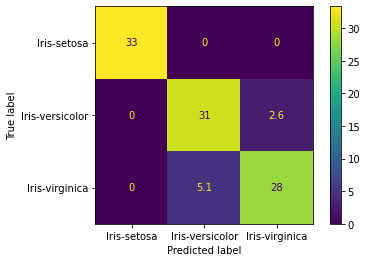



Accuracy On Train Dataset In Percent = 96.3963963963964
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         30.63063063  2.7027027 ]
 [ 0.          0.9009009  32.43243243]]




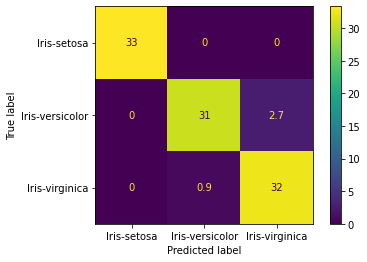

--------------------------------------------------------------------
				Iteration 2
Accuracy On Test Dataset In Percent = 92.3076923076923
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         28.20512821  5.12820513]
 [ 0.          2.56410256 30.76923077]]




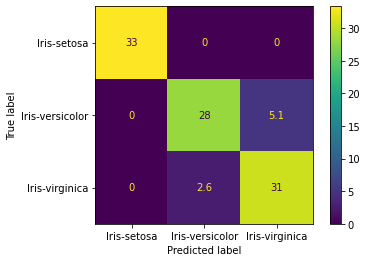



Accuracy On Train Dataset In Percent = 97.2972972972973
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         33.33333333  0.        ]
 [ 0.          2.7027027  30.63063063]]




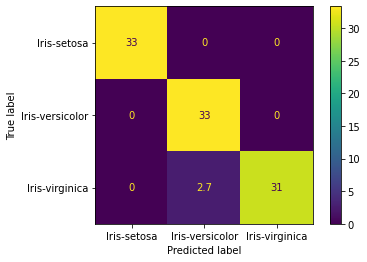

--------------------------------------------------------------------
				Iteration 3
Accuracy On Test Dataset In Percent = 94.44444444444444
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         30.55555556  2.77777778]
 [ 0.          2.77777778 30.55555556]]




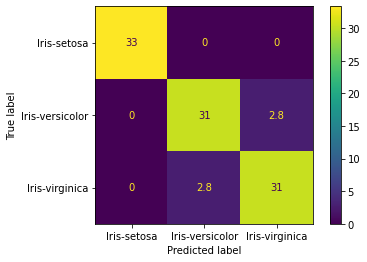



Accuracy On Train Dataset In Percent = 95.6140350877193
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         31.57894737  1.75438596]
 [ 0.          2.63157895 30.70175439]]




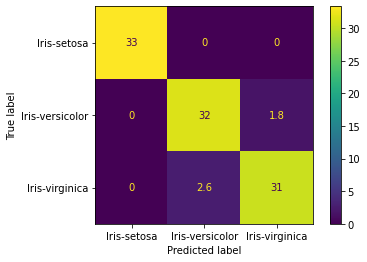

--------------------------------------------------------------------
				Iteration 4
Accuracy On Test Dataset In Percent = 100.0
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         33.33333333  0.        ]
 [ 0.          0.         33.33333333]]




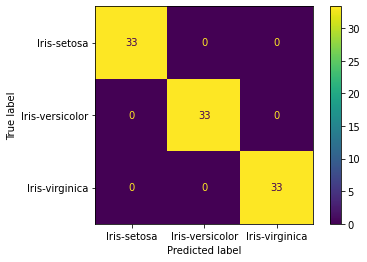



Accuracy On Train Dataset In Percent = 93.85964912280701
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         30.70175439  2.63157895]
 [ 0.          3.50877193 29.8245614 ]]




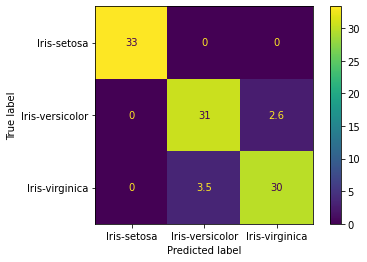

--------------------------------------------------------------------
Average Accuracy On Test Dataset In Percent =  94.76495726495726
Average Test Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         30.71581197  2.61752137]
 [ 0.          2.61752137 30.71581197]]




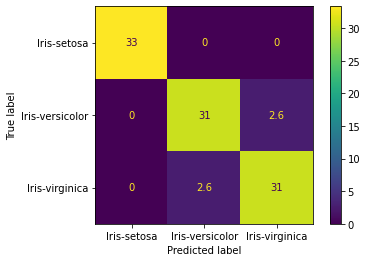



Average Accuracy On Train Dataset In Percent =  95.791844476055
Average Train Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         31.56116643  1.7721669 ]
 [ 0.          2.43598862 30.89734471]]




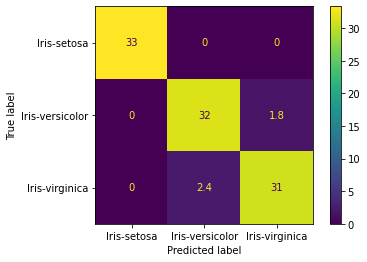

In [111]:
# Part C ( With Method Of Part B )
# 4-Fold Cross Validation
k = 4 
kf = KFold(n_splits = k , shuffle=True , random_state = 4)

Train0 = []
Train1 = []
Train2 = []
Test0 = []
Test1 = []
Test2 = []
Average_Acc_On_Test = 0 
Average_Acc_On_Train = 0
Average_Test_Conf_Mat = 0
Average_Train_Conf_Mat = 0
#-------------------------------------------------------------------------------------#
# Splitting Dataset To Train Dataset & Test Dataset
for train_indices, test_indices in kf.split(X_Class0):
  Test0.append(test_indices)
  Train0.append(train_indices)

for train_indices, test_indices in kf.split(X_Class1):
  Test1.append(test_indices)
  Train1.append(train_indices)

for train_indices, test_indices in kf.split(X_Class2):
  Test2.append(test_indices)
  Train2.append(train_indices)
#-------------------------------------------------------------------------------------#
for i in range(4):
  print(f"\t\t\t\tIteration {i+1}")
    # Training Stage
  Mu0 = np.mean(X_Class0.iloc[Train0[i]]) # Mean Matrix Of Class 0
  Covariance_Matrix0 = np.cov(X_Class0.iloc[Train0[i]].T) # Covariance Matrix Of Class 0
  Covariance_Matrix0 = np.diag( np.diag(Covariance_Matrix0) ) # Diagonal Covariance Matrix Of Class 0

  Mu1 = np.mean(X_Class1.iloc[Train1[i]]) # Mean Matrix Of Class 1
  Covariance_Matrix1 = np.cov(X_Class1.iloc[Train1[i]].T) # Covariance Matrix Of Class 1
  Covariance_Matrix1 = np.diag( np.diag(Covariance_Matrix1) ) # Diagonal Covariance Matrix Of Class 1

  Mu2 = np.mean(X_Class2.iloc[Train2[i]]) # Mean Matrix Of Class 2
  Covariance_Matrix2 = np.cov(X_Class2.iloc[Train2[i]].T) # Covariance Matrix Of Class 2
  Covariance_Matrix2 = np.diag( np.diag(Covariance_Matrix2) ) # Diagonal Covariance Matrix Of Class 2

  X_Train = pd.concat([X_Class0.iloc[Train0[i],:], X_Class1.iloc[Train1[i],:] , X_Class2.iloc[Train2[i],:]], axis=0)
  Y_Train = pd.concat([Y_Class0.iloc[Train0[i],],  Y_Class1.iloc[Train1[i],]  , Y_Class2.iloc[Train2[i],]], axis=0)

  X_Test = pd.concat([X_Class0.iloc[Test0[i],:], X_Class1.iloc[Test1[i],:] , X_Class2.iloc[Test2[i],:]], axis=0)
  Y_Test = pd.concat([Y_Class0.iloc[Test0[i],],  Y_Class1.iloc[Test1[i],]  , Y_Class2.iloc[Test2[i],]], axis=0)
#-------------------------------------------------------------------------------------#
# Testing On Test Dataset ( ML )
  Prob0 = multivariate_normal.pdf( X_Test, mean = Mu0 , cov = Covariance_Matrix0 ) # P( X_Test | Class 0)
  Prob1 = multivariate_normal.pdf( X_Test, mean = Mu1 , cov = Covariance_Matrix1 ) # P( X_Test | Class 1)
  Prob2 = multivariate_normal.pdf( X_Test, mean = Mu2 , cov = Covariance_Matrix2 ) # P( X_Test | Class 2)
  Y_Predict = []
  for i in range(X_Test.shape[0]): # Predicting X_Test Dataset Class
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy On Test Dataset
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Test.values[i]:
      Error_Counter += 1

  Error_On_Test = Error_Counter / X_Test.shape[0]
  Acc_On_Test = 1 - Error_On_Test
  Average_Acc_On_Test += Acc_On_Test 
  print(f"Accuracy On Test Dataset In Percent = {Acc_On_Test*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Test.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Test_Conf_Mat += CM
  print('Confusion Matrix In Percent:\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  print("\n")
  
#-------------------------------------------------------------------------------------#
  # Testing On Train Dataset ( ML )
  Prob0 = multivariate_normal.pdf( X_Train, mean = Mu0 , cov = Covariance_Matrix0 ) # P( X_Train | Class 0)
  Prob1 = multivariate_normal.pdf( X_Train, mean = Mu1 , cov = Covariance_Matrix1 ) # P( X_Train | Class 1)
  Prob2 = multivariate_normal.pdf( X_Train, mean = Mu2 , cov = Covariance_Matrix2 ) # P( X_Train | Class 2)
  Y_Predict = []
  for i in range(X_Train.shape[0]): # Predicting X_Train Dataset Class
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Train.values[i]:
      Error_Counter += 1

  Error_On_Train = Error_Counter / X_Train.shape[0]
  Acc_On_Train = 1 - Error_On_Train
  Average_Acc_On_Train += Acc_On_Train
  print(f"Accuracy On Train Dataset In Percent = {Acc_On_Train*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Train.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Train_Conf_Mat += CM
  print('Confusion Matrix In Percent :\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  
  print("--------------------------------------------------------------------")

print("Average Accuracy On Test Dataset In Percent = ",Average_Acc_On_Test*100/4 )
print("Average Test Dataset Confusion Matrix In Percent = \n",Average_Test_Conf_Mat/4 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Test_Conf_Mat/4 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")
print("Average Accuracy On Train Dataset In Percent = ",Average_Acc_On_Train*100/4 )
print("Average Train Dataset Confusion Matrix In Percent = \n",Average_Train_Conf_Mat/4 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Train_Conf_Mat/4 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()

				Iteration 1
Accuracy On Test Dataset In Percent = 93.33333333333333
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         31.11111111  2.22222222]
 [ 0.          4.44444444 28.88888889]]




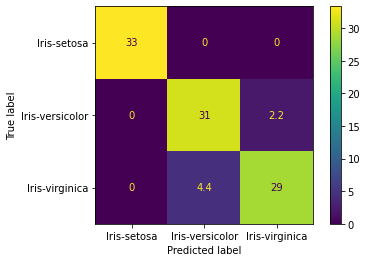



Accuracy On Train Dataset In Percent = 96.19047619047619
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         30.47619048  2.85714286]
 [ 0.          0.95238095 32.38095238]]




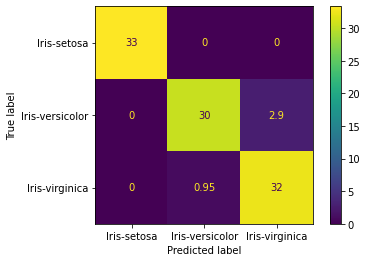

--------------------------------------------------------------------
				Iteration 2
Accuracy On Test Dataset In Percent = 93.33333333333333
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         31.11111111  2.22222222]
 [ 0.          4.44444444 28.88888889]]




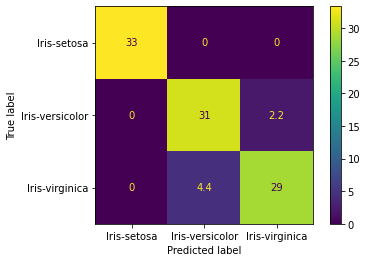



Accuracy On Train Dataset In Percent = 96.19047619047619
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         31.42857143  1.9047619 ]
 [ 0.          1.9047619  31.42857143]]




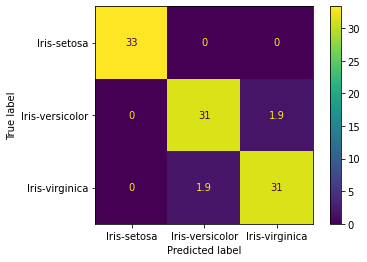

--------------------------------------------------------------------
Average Accuracy On Test Dataset In Percent =  93.33333333333333
Average Test Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         31.11111111  2.22222222]
 [ 0.          4.44444444 28.88888889]]




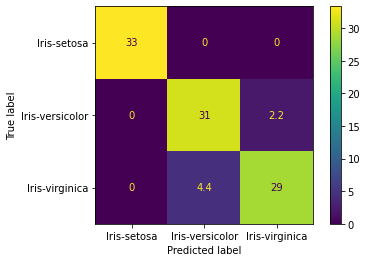



Average Accuracy On Train Dataset In Percent =  96.19047619047619
Average Train Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         30.95238095  2.38095238]
 [ 0.          1.42857143 31.9047619 ]]




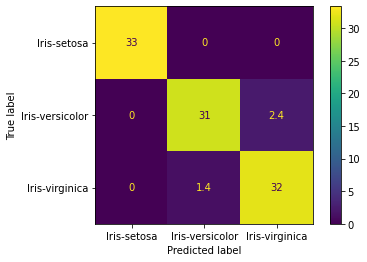

In [112]:
# Part D 
Average_Acc_On_Test = 0 
Average_Acc_On_Train = 0
Average_Test_Conf_Mat = 0
Average_Train_Conf_Mat = 0 
for i in range(2):
  print(f"\t\t\t\tIteration {i+1}")
  # Splitting Dataset To Train Dataset & Test Dataset
  X_Train0 , X_Test0 , Y_Train0 , Y_Test0 = train_test_split( X_Class0 , Y_Class0 , test_size= 0.3  , random_state = i+4 )
  X_Train1 , X_Test1 , Y_Train1 , Y_Test1 = train_test_split( X_Class1 , Y_Class1 , test_size= 0.3  , random_state = i+4 )
  X_Train2 , X_Test2 , Y_Train2 , Y_Test2 = train_test_split( X_Class2 , Y_Class2 , test_size= 0.3  , random_state = i+4 )

  X_Train = pd.concat([X_Train0, X_Train1 , X_Train2], axis=0)
  Y_Train = pd.concat([Y_Train0, Y_Train1 , Y_Train2], axis=0)

  X_Test = pd.concat([X_Test0, X_Test1 , X_Test2], axis=0)
  Y_Test = pd.concat([Y_Test0, Y_Test1 , Y_Test2], axis=0)
#-------------------------------------------------------------------------------------#
  # Training Stage
  Mu00 = np.mean(X_Train0.iloc[:,0]) # Feature Column 1 Mean Of Class 0
  Covariance00 = np.cov(X_Train0.iloc[:,0].T) # Feature Column 1 Covariance Of Class 0
  Mu10 = np.mean(X_Train0.iloc[:,1]) # Feature Column 2 Mean Of Class 0
  Covariance10 = np.cov(X_Train0.iloc[:,1].T) # Feature Column 2 Covariance Of Class 0
  Mu20 = np.mean(X_Train0.iloc[:,2]) # Feature Column 3 Mean Of Class 0
  Covariance20 = np.cov(X_Train0.iloc[:,2].T) # Feature Column 3 Covariance Of Class 0
  Mu30 = np.mean(X_Train0.iloc[:,3]) # Feature Column 4 Mean Of Class 0
  Covariance30 = np.cov(X_Train0.iloc[:,3].T) # Feature Column 4 Covariance Of Class 0

  Mu01 = np.mean(X_Train1.iloc[:,0]) # Feature Column 1 Mean Of Class 1
  Covariance01 = np.cov(X_Train1.iloc[:,0].T) # Feature Column 1 Covariance Of Class 1
  Mu11 = np.mean(X_Train1.iloc[:,1]) # Feature Column 2 Mean Of Class 1
  Covariance11 = np.cov(X_Train1.iloc[:,1].T) # Feature Column 2 Covariance Of Class 1
  Mu21 = np.mean(X_Train1.iloc[:,2]) # Feature Column 3 Mean Of Class 1
  Covariance21 = np.cov(X_Train1.iloc[:,2].T) # Feature Column 3 Covariance Of Class 1
  Mu31 = np.mean(X_Train1.iloc[:,3]) # Feature Column 4 Mean Of Class 1
  Covariance31 = np.cov(X_Train1.iloc[:,3].T) # Feature Column 4 Covariance Of Class 1

  Mu02 = np.mean(X_Train2.iloc[:,0]) # Feature Column 1 Mean Of Class 2
  Covariance02 = np.cov(X_Train2.iloc[:,0].T) # Feature Column 1 Covariance Of Class 2
  Mu12 = np.mean(X_Train2.iloc[:,1]) # Feature Column 2 Mean Of Class 2
  Covariance12 = np.cov(X_Train2.iloc[:,1].T) # Feature Column 2 Covariance Of Class 2
  Mu22 = np.mean(X_Train2.iloc[:,2]) # Feature Column 3 Mean Of Class 2
  Covariance22 = np.cov(X_Train2.iloc[:,2].T) # Feature Column 3 Covariance Of Class 2
  Mu32 = np.mean(X_Train2.iloc[:,3]) # Feature Column 4 Mean Of Class 2
  Covariance32 = np.cov(X_Train2.iloc[:,3].T) # Feature Column 4 Covariance Of Class 2

  Prob_Class0 = Prob_Class1 = Prob_Class2 = 1/3  # P(Claas 0) = P(Claas 1) = P(Claas 2)
#-------------------------------------------------------------------------------------#
  # Testing On Test Dataset ( Gaussion Naive Beyes )
  Prob0 = multivariate_normal.pdf( X_Test.iloc[:,0], mean = Mu00 , cov = Covariance00 ) # P( X_Test1 | Class0 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Test.iloc[:,1], mean = Mu10 , cov = Covariance10 ) # P( X_Test2 | Class0 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Test.iloc[:,2], mean = Mu20 , cov = Covariance20 ) # P( X_Test3 | Class0 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Test.iloc[:,3], mean = Mu30 , cov = Covariance30 ) # P( X_Test4 | Class0 )
  Prob0 = Prob0 * Prob_Class0

  Prob1 = multivariate_normal.pdf( X_Test.iloc[:,0], mean = Mu01 , cov = Covariance01 ) # P( X_Test1 | Class1 ) 
  Prob1 = Prob1 * multivariate_normal.pdf( X_Test.iloc[:,1], mean = Mu11 , cov = Covariance11 ) # P( X_Test2 | Class1 )
  Prob1 = Prob1 * multivariate_normal.pdf( X_Test.iloc[:,2], mean = Mu21 , cov = Covariance21 ) # P( X_Test3 | Class1 )
  Prob1 = Prob1 * multivariate_normal.pdf( X_Test.iloc[:,3], mean = Mu31 , cov = Covariance31 ) # P( X_Test4 | Class1 )
  Prob1 = Prob1 * Prob_Class1

  Prob2 = multivariate_normal.pdf( X_Test.iloc[:,0], mean = Mu02 , cov = Covariance02 ) # P( X_Test1 | Class2 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Test.iloc[:,1], mean = Mu12 , cov = Covariance12 ) # P( X_Test2 | Class2 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Test.iloc[:,2], mean = Mu22 , cov = Covariance22 ) # P( X_Test3 | Class2 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Test.iloc[:,3], mean = Mu32 , cov = Covariance32 ) # P( X_Test4 | Class2 )
  Prob2 = Prob2 * Prob_Class2

  Y_Predict = []
  for i in range(X_Test.shape[0]): # Predicting X_Test Dataset Class
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy On Test Dataset
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Test.values[i]:
      Error_Counter += 1

  Error_On_Test = Error_Counter / X_Test.shape[0]
  Acc_On_Test = 1 - Error_On_Test
  Average_Acc_On_Test += Acc_On_Test 
  print(f"Accuracy On Test Dataset In Percent = {Acc_On_Test*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Test.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Test_Conf_Mat += CM
  print('Confusion Matrix In Percent:\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  print("\n")
  
#-------------------------------------------------------------------------------------#
  # Testing On Train Dataset ( Gaussion Naive Beyes )
  Prob0 = multivariate_normal.pdf( X_Train.iloc[:,0], mean = Mu00 , cov = Covariance00 ) # P( X_Train1 | Class0 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Train.iloc[:,1], mean = Mu10 , cov = Covariance10 ) # P( X_Train2 | Class0 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Train.iloc[:,2], mean = Mu20 , cov = Covariance20 ) # P( X_Train3 | Class0 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Train.iloc[:,3], mean = Mu30 , cov = Covariance30 ) # P( X_Train4 | Class0 )
  Prob0 = Prob0 * Prob_Class0

  Prob1 = multivariate_normal.pdf( X_Train.iloc[:,0], mean = Mu01 , cov = Covariance01 ) # P( X_Train1 | Class1 ) 
  Prob1 = Prob1 * multivariate_normal.pdf( X_Train.iloc[:,1], mean = Mu11 , cov = Covariance11 ) # P( X_Train2 | Class1 )
  Prob1 = Prob1 * multivariate_normal.pdf( X_Train.iloc[:,2], mean = Mu21 , cov = Covariance21 ) # P( X_Train3 | Class1 )
  Prob1 = Prob1 * multivariate_normal.pdf( X_Train.iloc[:,3], mean = Mu31 , cov = Covariance31 ) # P( X_Train4 | Class1 )
  Prob1 = Prob1 * Prob_Class1

  Prob2 = multivariate_normal.pdf( X_Train.iloc[:,0], mean = Mu02 , cov = Covariance02 ) # P( X_Train1 | Class2 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Train.iloc[:,1], mean = Mu12 , cov = Covariance12 ) # P( X_Train2 | Class2 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Train.iloc[:,2], mean = Mu22 , cov = Covariance22 ) # P( X_Train3 | Class2 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Train.iloc[:,3], mean = Mu32 , cov = Covariance32 ) # P( X_Train4 | Class2 )
  Prob2 = Prob2 * Prob_Class2

  Y_Predict = []
  for i in range(X_Train.shape[0]): # Predicting X_Train Dataset Class
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Train.values[i]:
      Error_Counter += 1

  Error_On_Train = Error_Counter / X_Train.shape[0]
  Acc_On_Train = 1 - Error_On_Train
  Average_Acc_On_Train += Acc_On_Train
  print(f"Accuracy On Train Dataset In Percent = {Acc_On_Train*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Train.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Train_Conf_Mat += CM
  print('Confusion Matrix In Percent :\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  
  print("--------------------------------------------------------------------")

print("Average Accuracy On Test Dataset In Percent = ",Average_Acc_On_Test*100/2 )
print("Average Test Dataset Confusion Matrix In Percent = \n",Average_Test_Conf_Mat/2 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Test_Conf_Mat/2 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")
print("Average Accuracy On Train Dataset In Percent = ",Average_Acc_On_Train*100/2 )
print("Average Train Dataset Confusion Matrix In Percent = \n",Average_Train_Conf_Mat/2 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Train_Conf_Mat/2 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()

				Iteration 1
Accuracy On Test Dataset In Percent = 92.3076923076923
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         30.76923077  2.56410256]
 [ 0.          5.12820513 28.20512821]]




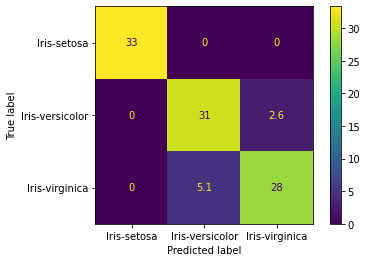



Accuracy On Train Dataset In Percent = 96.3963963963964
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         30.63063063  2.7027027 ]
 [ 0.          0.9009009  32.43243243]]




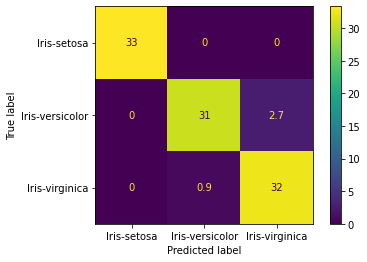

--------------------------------------------------------------------
				Iteration 2
Accuracy On Test Dataset In Percent = 92.3076923076923
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         28.20512821  5.12820513]
 [ 0.          2.56410256 30.76923077]]




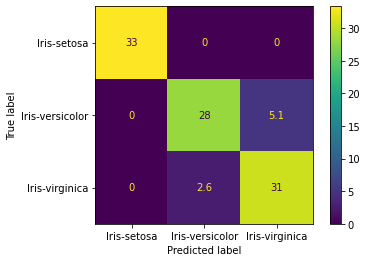



Accuracy On Train Dataset In Percent = 97.2972972972973
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         33.33333333  0.        ]
 [ 0.          2.7027027  30.63063063]]




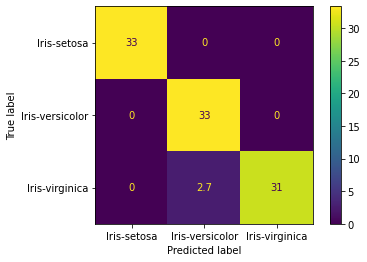

--------------------------------------------------------------------
				Iteration 3
Accuracy On Test Dataset In Percent = 94.44444444444444
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         30.55555556  2.77777778]
 [ 0.          2.77777778 30.55555556]]




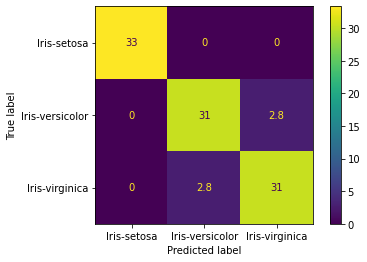



Accuracy On Train Dataset In Percent = 95.6140350877193
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         31.57894737  1.75438596]
 [ 0.          2.63157895 30.70175439]]




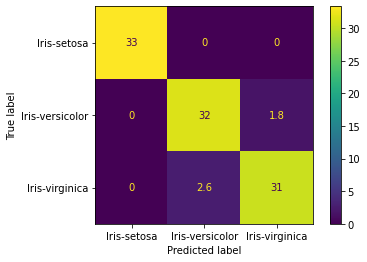

--------------------------------------------------------------------
				Iteration 4
Accuracy On Test Dataset In Percent = 100.0
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         33.33333333  0.        ]
 [ 0.          0.         33.33333333]]




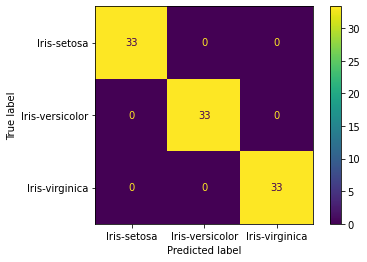



Accuracy On Train Dataset In Percent = 93.85964912280701
Confusion Matrix In Percent :
 [[33.33333333  0.          0.        ]
 [ 0.         30.70175439  2.63157895]
 [ 0.          3.50877193 29.8245614 ]]




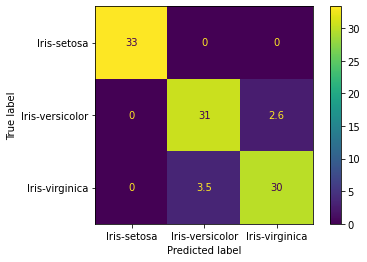

--------------------------------------------------------------------
Average Accuracy On Test Dataset In Percent =  94.76495726495726
Average Test Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         30.71581197  2.61752137]
 [ 0.          2.61752137 30.71581197]]




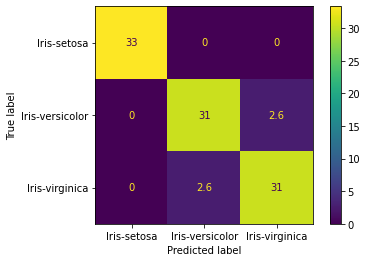



Average Accuracy On Train Dataset In Percent =  95.791844476055
Average Train Dataset Confusion Matrix In Percent = 
 [[33.33333333  0.          0.        ]
 [ 0.         31.56116643  1.7721669 ]
 [ 0.          2.43598862 30.89734471]]




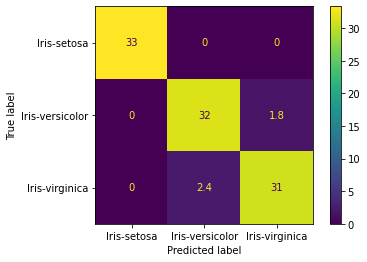

In [113]:
# Part E
# 4-Fold Cross Validation
k = 4 
kf = KFold(n_splits = k , shuffle=True , random_state = 4)

Train0 = []
Train1 = []
Train2 = []
Test0 = []
Test1 = []
Test2 = []
Average_Acc_On_Test = 0 
Average_Acc_On_Train = 0
Average_Test_Conf_Mat = 0
Average_Train_Conf_Mat = 0
#-------------------------------------------------------------------------------------#
# Splitting Dataset To Train Dataset & Test Dataset
for train_indices, test_indices in kf.split(X_Class0):
  Test0.append(test_indices)
  Train0.append(train_indices)

for train_indices, test_indices in kf.split(X_Class1):
  Test1.append(test_indices)
  Train1.append(train_indices)

for train_indices, test_indices in kf.split(X_Class2):
  Test2.append(test_indices)
  Train2.append(train_indices)
#-------------------------------------------------------------------------------------#
for i in range(4):
  print(f"\t\t\t\tIteration {i+1}")
    # Training Stage
  Mu00 = np.mean(X_Class0.iloc[Train0[i],0])
  Covariance00 = np.cov(X_Class0.iloc[Train0[i],0].T)
  Mu10 = np.mean(X_Class0.iloc[Train0[i],1])
  Covariance10 = np.cov(X_Class0.iloc[Train0[i],1].T)
  Mu20 = np.mean(X_Class0.iloc[Train0[i],2])
  Covariance20 = np.cov(X_Class0.iloc[Train0[i],2].T)
  Mu30 = np.mean(X_Class0.iloc[Train0[i],3])
  Covariance30 = np.cov(X_Class0.iloc[Train0[i],3].T)

  Mu01 = np.mean(X_Class1.iloc[Train1[i],0])
  Covariance01 = np.cov(X_Class1.iloc[Train1[i],0].T)
  Mu11 = np.mean(X_Class1.iloc[Train1[i],1])
  Covariance11 = np.cov(X_Class1.iloc[Train1[i],1].T)
  Mu21 = np.mean(X_Class1.iloc[Train1[i],2])
  Covariance21 = np.cov(X_Class1.iloc[Train1[i],2].T)
  Mu31 = np.mean(X_Class1.iloc[Train1[i],3])
  Covariance31 = np.cov(X_Class1.iloc[Train1[i],3].T)

  Mu02 = np.mean(X_Class2.iloc[Train2[i],0])
  Covariance02 = np.cov(X_Class2.iloc[Train2[i],0].T)
  Mu12 = np.mean(X_Class2.iloc[Train2[i],1])
  Covariance12 = np.cov(X_Class2.iloc[Train2[i],1].T)
  Mu22 = np.mean(X_Class2.iloc[Train2[i],2])
  Covariance22 = np.cov(X_Class2.iloc[Train2[i],2].T)
  Mu32 = np.mean(X_Class2.iloc[Train2[i],3])
  Covariance32 = np.cov(X_Class2.iloc[Train2[i],3].T)

  X_Train = pd.concat([X_Class0.iloc[Train0[i],:], X_Class1.iloc[Train1[i],:] , X_Class2.iloc[Train2[i],:]], axis=0)
  Y_Train = pd.concat([Y_Class0.iloc[Train0[i],],  Y_Class1.iloc[Train1[i],]  , Y_Class2.iloc[Train2[i],]], axis=0)

  X_Test = pd.concat([X_Class0.iloc[Test0[i],:], X_Class1.iloc[Test1[i],:] , X_Class2.iloc[Test2[i],:]], axis=0)
  Y_Test = pd.concat([Y_Class0.iloc[Test0[i],],  Y_Class1.iloc[Test1[i],]  , Y_Class2.iloc[Test2[i],]], axis=0)

  Num_Class0 = Y_Train[Y_Train.values == Class0].shape[0]
  Num_Class1 = Y_Train[Y_Train.values == Class1].shape[0]
  Num_Class2 = Y_Train[Y_Train.values == Class2].shape[0]

  Prob_Class0 = Num_Class0 / Y_Train.shape[0] # P(Claas 0)
  Prob_Class1 = Num_Class1 / Y_Train.shape[0] # P(Claas 1)
  Prob_Class2 = Num_Class2 / Y_Train.shape[0] # P(Claas 2)
  
#-------------------------------------------------------------------------------------#
# Testing On Test Dataset ( Gaussion Naive Beyes )

  Prob0 = multivariate_normal.pdf( X_Test.iloc[:,0], mean = Mu00 , cov = Covariance00 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Test.iloc[:,1], mean = Mu10 , cov = Covariance10 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Test.iloc[:,2], mean = Mu20 , cov = Covariance20 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Test.iloc[:,3], mean = Mu30 , cov = Covariance30 )
  Prob0 = Prob0 * Prob_Class0

  Prob1 = multivariate_normal.pdf( X_Test.iloc[:,0], mean = Mu01 , cov = Covariance01 )
  Prob1 = Prob1 * multivariate_normal.pdf( X_Test.iloc[:,1], mean = Mu11 , cov = Covariance11 )
  Prob1 = Prob1 * multivariate_normal.pdf( X_Test.iloc[:,2], mean = Mu21 , cov = Covariance21 )
  Prob1 = Prob1 * multivariate_normal.pdf( X_Test.iloc[:,3], mean = Mu31 , cov = Covariance31 )
  Prob1 = Prob1 * Prob_Class1

  Prob2 = multivariate_normal.pdf( X_Test.iloc[:,0], mean = Mu02 , cov = Covariance02 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Test.iloc[:,1], mean = Mu12 , cov = Covariance12 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Test.iloc[:,2], mean = Mu22 , cov = Covariance22 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Test.iloc[:,3], mean = Mu32 , cov = Covariance32 )
  Prob2 = Prob2 * Prob_Class2

  Y_Predict = []
  for i in range(X_Test.shape[0]):
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy On Test Dataset
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Test.values[i]:
      Error_Counter += 1

  Error_On_Test = Error_Counter / X_Test.shape[0]
  Acc_On_Test = 1 - Error_On_Test
  Average_Acc_On_Test += Acc_On_Test 
  print(f"Accuracy On Test Dataset In Percent = {Acc_On_Test*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Test.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Test_Conf_Mat += CM
  print('Confusion Matrix In Percent:\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  print("\n")
  
#-------------------------------------------------------------------------------------#
  # Testing On Train Dataset ( Gaussion Naive Beyes )

  Prob0 = multivariate_normal.pdf( X_Train.iloc[:,0], mean = Mu00 , cov = Covariance00 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Train.iloc[:,1], mean = Mu10 , cov = Covariance10 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Train.iloc[:,2], mean = Mu20 , cov = Covariance20 )
  Prob0 = Prob0 * multivariate_normal.pdf( X_Train.iloc[:,3], mean = Mu30 , cov = Covariance30 )
  Prob0 = Prob0 * Prob_Class0

  Prob1 = multivariate_normal.pdf( X_Train.iloc[:,0], mean = Mu01 , cov = Covariance01 )
  Prob1 = Prob1 * multivariate_normal.pdf( X_Train.iloc[:,1], mean = Mu11 , cov = Covariance11 )
  Prob1 = Prob1 * multivariate_normal.pdf( X_Train.iloc[:,2], mean = Mu21 , cov = Covariance21 )
  Prob1 = Prob1 * multivariate_normal.pdf( X_Train.iloc[:,3], mean = Mu31 , cov = Covariance31 )
  Prob1 = Prob1 * Prob_Class1

  Prob2 = multivariate_normal.pdf( X_Train.iloc[:,0], mean = Mu02 , cov = Covariance02 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Train.iloc[:,1], mean = Mu12 , cov = Covariance12 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Train.iloc[:,2], mean = Mu22 , cov = Covariance22 )
  Prob2 = Prob2 * multivariate_normal.pdf( X_Train.iloc[:,3], mean = Mu32 , cov = Covariance32 )
  Prob2 = Prob2 * Prob_Class2

  Y_Predict = []
  for i in range(X_Train.shape[0]):
    if Prob0[i] > Prob1[i] and Prob0[i] > Prob2[i]:
      Y_Predict.append(Class0)
    elif Prob1[i] > Prob0[i] and Prob1[i] > Prob2[i]:
      Y_Predict.append(Class1)
    elif Prob2[i] > Prob0[i] and Prob2[i] > Prob1[i]:
      Y_Predict.append(Class2)

  Y_Predict = np.array(Y_Predict)

  # Calculating Accuracy
  Error_Counter = 0 
  for i in range(Y_Predict.shape[0]):
    if Y_Predict[i] != Y_Train.values[i]:
      Error_Counter += 1

  Error_On_Train = Error_Counter / X_Train.shape[0]
  Acc_On_Train = 1 - Error_On_Train
  Average_Acc_On_Train += Acc_On_Train
  print(f"Accuracy On Train Dataset In Percent = {Acc_On_Train*100}")
  # Calculation & Plotting Confusion Matrix
  CM = confusion_matrix (Y_Train.values , Y_Predict)
  CM = (CM*100) / Y_Predict.shape[0]
  Average_Train_Conf_Mat += CM
  print('Confusion Matrix In Percent :\n', CM) 
  disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
  disp.plot()
  print("\n")
  plt.show()
  
  print("--------------------------------------------------------------------")

print("Average Accuracy On Test Dataset In Percent = ",Average_Acc_On_Test*100/4 )
print("Average Test Dataset Confusion Matrix In Percent = \n",Average_Test_Conf_Mat/4 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Test_Conf_Mat/4 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")
print("Average Accuracy On Train Dataset In Percent = ",Average_Acc_On_Train*100/4 )
print("Average Train Dataset Confusion Matrix In Percent = \n",Average_Train_Conf_Mat/4 )
disp = ConfusionMatrixDisplay(confusion_matrix=Average_Train_Conf_Mat/4 , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
